Upload Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

import warnings
warnings.filterwarnings("ignore")

Importing Dataset

In [31]:
#loading the dataset to pandas dataframe
election_dataset = pd.read_csv('/Election_Data.csv')

In [32]:
type(election_dataset)

pandas.core.frame.DataFrame

Data Processing And EDA

In [33]:
#printing the first five rows of dataframe
election_dataset.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [34]:
#removing first column
election_dataset.drop('Unnamed: 0', axis=1, inplace= True)

In [35]:
election_dataset.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [36]:
#number of rows and columns
election_dataset.shape

(1525, 9)

In [37]:
print("no. of rows: ", election_dataset.shape[0], "\n" "no. of columns: ", election_dataset.shape[1])

no. of rows:  1525 
no. of columns:  9


In [38]:
#Data type of Data Features
election_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


Age is a numerical variable. economic.cond.national, economic.cond.household, Blair, Hague, Europe, political.knowledge are ordered categorical variables. The numeric values represent the order. Vote and gender are categorical variables.

In [39]:
#describe numerical columns
election_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [40]:
#describe categorical columns
election_dataset[['vote','gender']].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [41]:
#checking for missing values
election_dataset.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no missing values in DataFrame

In [42]:
#Checking for duplicate data
duplicate = election_dataset.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

election_dataset[duplicate]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


Univariate Analysis

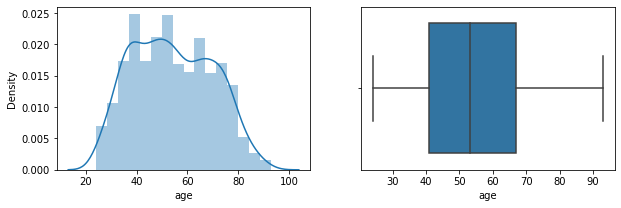

In [43]:
f,axes = plt.subplots(1,2, figsize = (10,3))
sns.distplot(election_dataset['age'], ax = axes[0])
sns.boxplot(election_dataset['age'],orient = "v",ax = axes[1])

There are no outliers. Skewness is not observed in the continuous variable age.

Bivariate and Multivariate Analysis

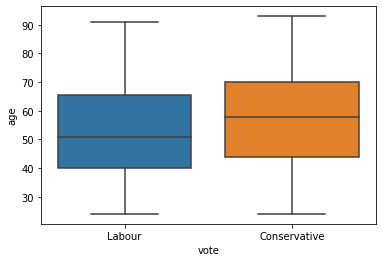

In [44]:
sns.boxplot(election_dataset["vote"], election_dataset["age"])

Younger people are more likely to vote for Labour party on an average

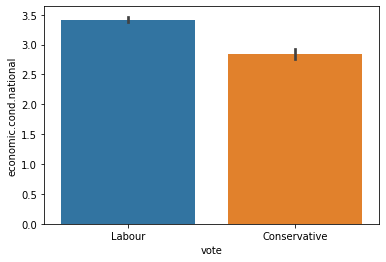

In [45]:
sns.barplot(election_dataset['vote'],election_dataset['economic.cond.national'])

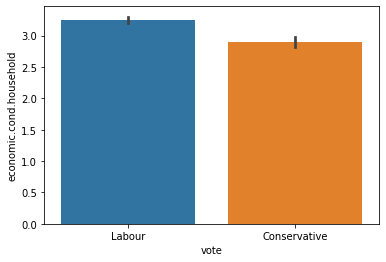

In [46]:
sns.barplot(election_dataset['vote'], election_dataset['economic.cond.household'])

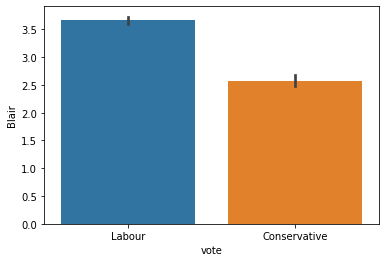

In [47]:
sns.barplot(election_dataset['vote'], election_dataset['Blair'])

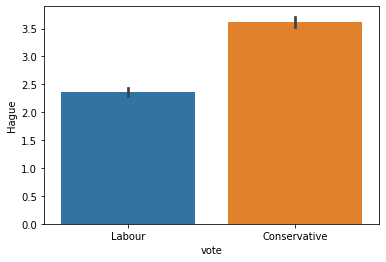

In [48]:
sns.barplot(election_dataset['vote'], election_dataset['Hague'])

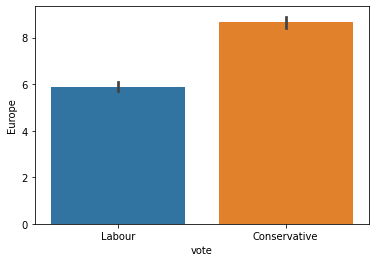

In [49]:
sns.barplot(election_dataset['vote'], election_dataset['Europe'])

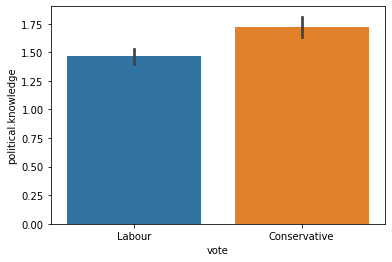

In [50]:
sns.barplot(election_dataset['vote'], election_dataset['political.knowledge'])

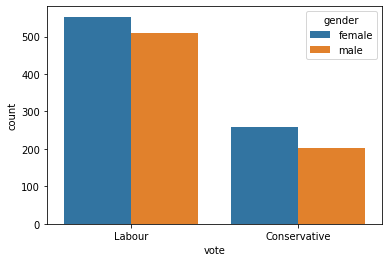

In [51]:
sns.countplot(election_dataset['vote'], hue= election_dataset['gender'])

Correlation Plot

In [52]:
election_dataset.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


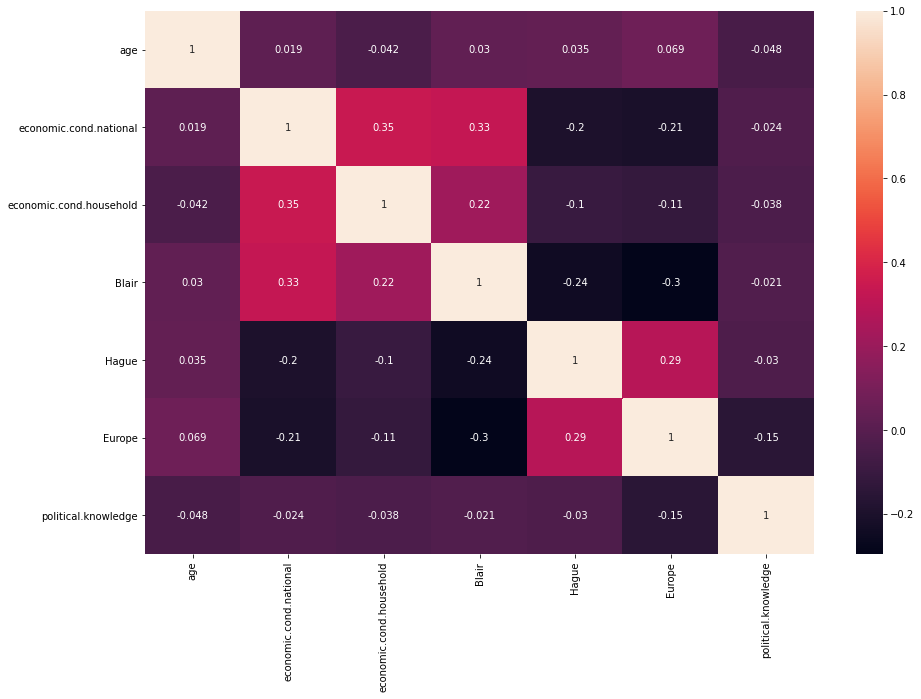

In [53]:
#plot
plt.figure(figsize= (15,10))
sns.heatmap(election_dataset.corr(), annot= True)
plt.show()

There is little or no correlation among the variables

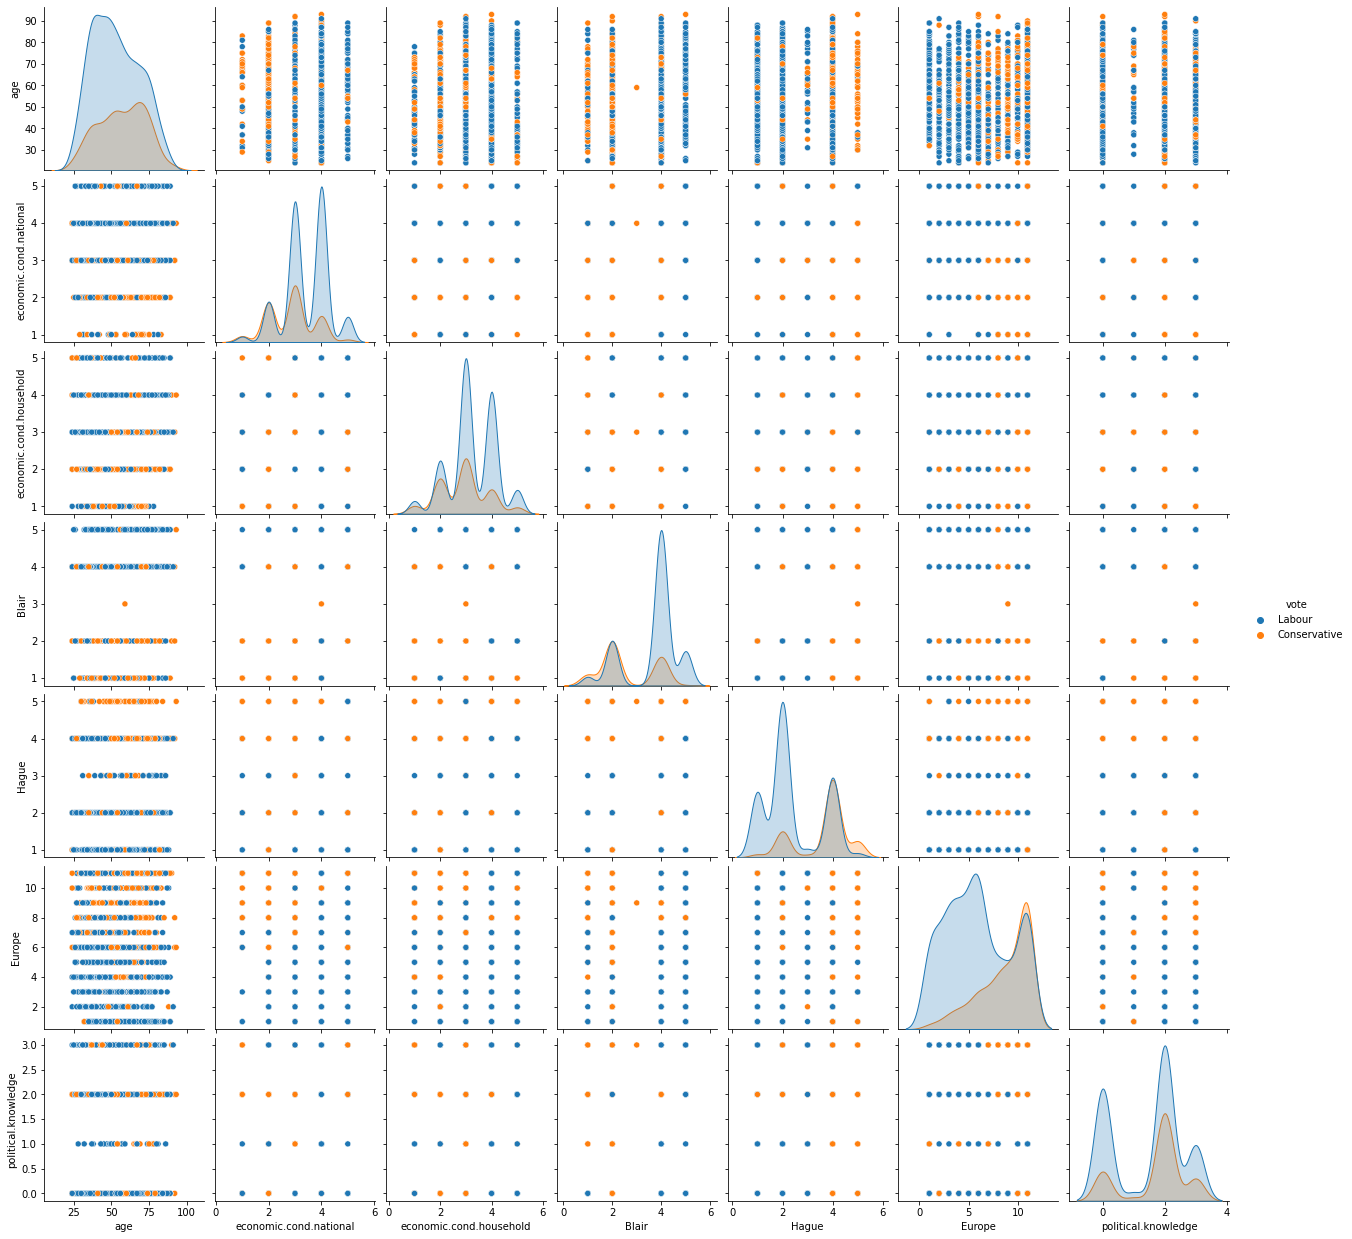

In [54]:
sns.pairplot(election_dataset, hue= 'vote', diag_kind= 'kde')

Label Encoding

In [130]:
#changing categorical columns into numerical values
election_dataset.replace({"vote": {'Labour': 0, 'Conservative': 1}}, inplace=True)

TypeError: ignored

In [59]:
election_dataset.replace({"gender": {'female': 0, 'male': 1}}, inplace=True)                                                             

TypeError: ignored

In [60]:
election_dataset.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


Train-Test Split

In [62]:
election_dataset.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [64]:
#Copy the predictor variables into X dataframe
X= election_dataset.drop('vote', axis = 1)

#Copy the target into y dataframe
y = election_dataset['vote']

In [65]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: vote, dtype: int64

In [68]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state =1 )

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(1525, 8) (1067, 8) (458, 8)


In [71]:
y_test.value_counts()

0    328
1    130
Name: vote, dtype: int64

Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
model= LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)

In [75]:
ytest_predict = model.predict(X_test)

In [76]:
#Accuracy - Training Data
LR_train_acc = model.score(X_train, y_train)
LR_train_acc

0.8397375820056232

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

AUC: 0.889


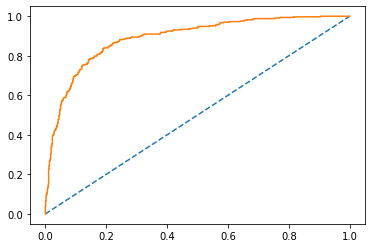

In [78]:
#AUC and ROC for the training data
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for 1 class only
probs = probs[:, 1]
#calculate AUC
LR_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
LR_train_fpr, LR_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr)

AUC: 0.883


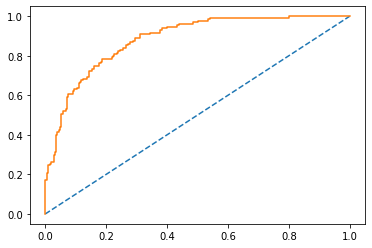

In [79]:
#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)

In [80]:
#Test Data Accuracy
LR_test_acc=model.score(X_test,y_test)
LR_test_acc

0.8231441048034934

In [81]:
#Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[667,  68],
       [103, 229]])

In [82]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [83]:
#Confusion Matrix for test data
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[292,  36],
       [ 45,  85]])

In [84]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_train_acc = KNN_model.score(X_train, y_train)
print(KNN_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8537956888472352
[[669  66]
 [ 90 242]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       735
           1       0.79      0.73      0.76       332

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



AUC: 0.921


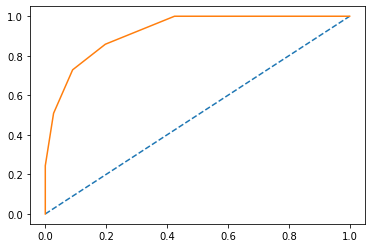

In [87]:
#AUC and ROC for the training data
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)

In [128]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_test_acc = KNN_model.score(X_test, y_test)
print(KNN_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[279  49]
 [ 49  81]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.835


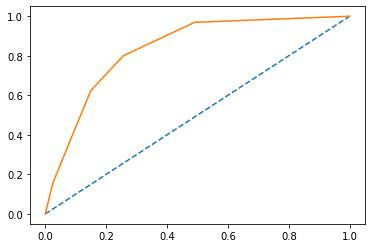

In [88]:
#AUC and ROC for the test data
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)

Naive Bayes Model

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [90]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
# Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, y_train)
print(NB_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[649  86]
 [ 92 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC: 0.886


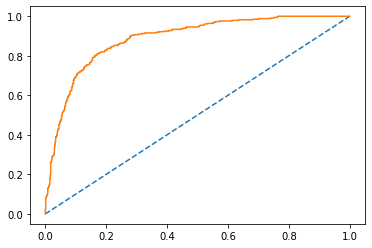

In [92]:
#AUC and ROC for the training data
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)

In [93]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, y_test)
print(NB_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[284  44]
 [ 36  94]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.885


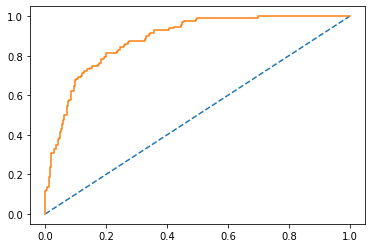

In [94]:
#AUC and ROC for the test data
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)

SVM

In [95]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.probability=True
SVM_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
SVM_train_acc = SVM_model.score(X_train, y_train)
print(SVM_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7835051546391752
[[701  34]
 [197 135]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       735
           1       0.80      0.41      0.54       332

    accuracy                           0.78      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.78      0.76      1067



AUC: 0.870


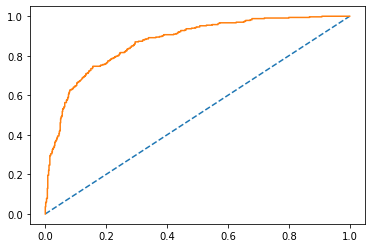

In [97]:
#AUC and ROC for the training data
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)

In [98]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
SVM_test_acc = SVM_model.score(X_test, y_test)
print(SVM_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[310  18]
 [ 80  50]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       328
           1       0.74      0.38      0.51       130

    accuracy                           0.79       458
   macro avg       0.77      0.66      0.68       458
weighted avg       0.78      0.79      0.76       458



AUC: 0.858


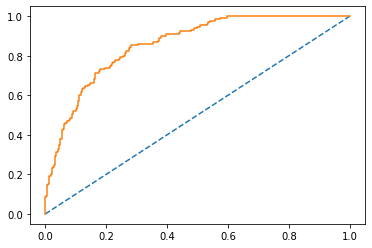

In [99]:
#AUC and ROC for the test data
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)

Bagging - Random Forest

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [101]:
param_grid1 = {
    'max_depth': [6,5],
    'max_features': [4,3],
    'min_samples_leaf': [30,25],
    'min_samples_split': [60,50],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 3)

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [104]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'n_estimators': 100}

In [105]:
RF_model = grid_search.best_estimator_

In [106]:
RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [107]:
#from sklearn.ensemble import RandomForestClassifier

#RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
#RF_model.fit(X_train, y_train)

In [108]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
RF_train_acc =RF_model.score(X_train, y_train)
print(RF_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8462980318650422
[[679  56]
 [108 224]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       735
           1       0.80      0.67      0.73       332

    accuracy                           0.85      1067
   macro avg       0.83      0.80      0.81      1067
weighted avg       0.84      0.85      0.84      1067



AUC: 0.907


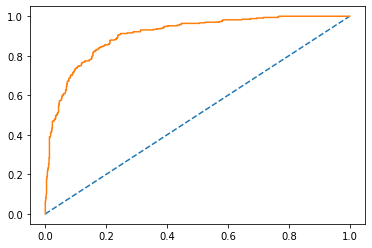

In [109]:
#AUC and ROC for the training data
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RF_train_auc)
# calculate roc curve
RF_train_fpr, RF_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)

In [110]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
RF_test_acc = RF_model.score(X_test, y_test)
print(RF_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.894


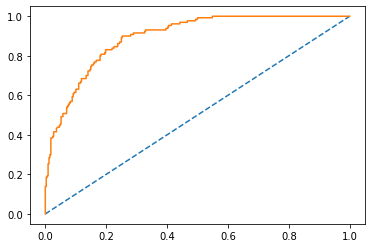

In [111]:
#AUC and ROC for the test data
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)

Ada Boost

In [112]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [113]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
ADB_train_acc = ADB_model.score(X_train, y_train)
print(ADB_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[666  69]
 [ 94 238]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       735
           1       0.78      0.72      0.74       332

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


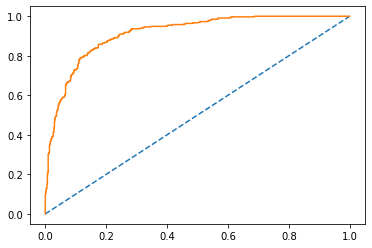

In [114]:
#AUC and ROC for the training data
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr)

In [115]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADB_test_acc = ADB_model.score(X_test, y_test)
print(ADB_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[285  43]
 [ 40  90]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       328
           1       0.68      0.69      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.879


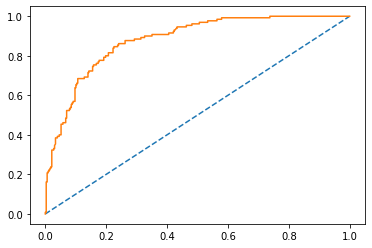

In [116]:
#AUC and ROC for the test data
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr)

Gradient Boost

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train, y_train)

In [118]:
## Performance Matrix on train data set
y_train_predict = GB_model.predict(X_train)
GB_train_acc = GB_model.score(X_train, y_train)
print(GB_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[684  51]
 [ 70 262]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       735
           1       0.84      0.79      0.81       332

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.950


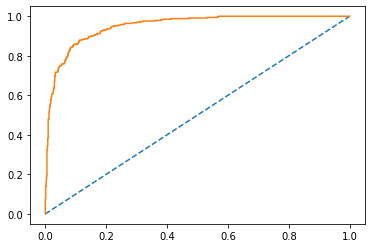

In [119]:
#AUC and ROC for the training data
probs = GB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % GB_train_auc)
# calculate roc curve
GB_train_fpr, GB_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_train_fpr, GB_train_tpr)

In [120]:
## Performance Matrix on test data set
y_test_predict = GB_model.predict(X_test)
GB_test_acc = GB_model.score(X_test, y_test)
print(GB_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[285  43]
 [ 34  96]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.74      0.71       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



AUC: 0.905


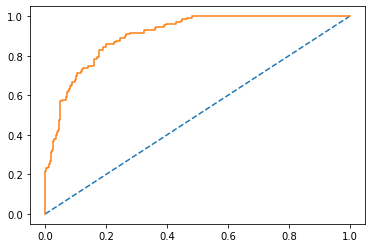

In [121]:
#AUC and ROC for the test data
probs = GB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % GB_test_auc)
# calculate roc curve
GB_test_fpr, GB_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_test_fpr, GB_test_tpr)

XG BOOST

In [122]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
XGB_train_acc = XGB_model.score(X_train, y_train)
print(XGB_train_acc)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8294283036551078
[[688  47]
 [135 197]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       735
           1       0.81      0.59      0.68       332

    accuracy                           0.83      1067
   macro avg       0.82      0.76      0.78      1067
weighted avg       0.83      0.83      0.82      1067



AUC: 0.899


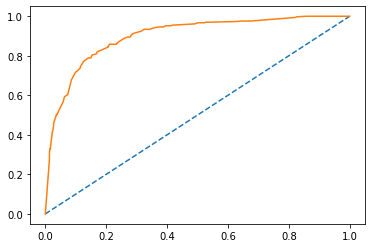

In [124]:
#AUC and ROC for the training data
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % XGB_train_auc)
# calculate roc curve
XGB_train_fpr, XGB_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_train_fpr, XGB_train_tpr)

In [125]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
XGB_test_acc = XGB_model.score(X_test, y_test)
print(XGB_test_acc)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8100436681222707
[[300  28]
 [ 59  71]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       328
           1       0.72      0.55      0.62       130

    accuracy                           0.81       458
   macro avg       0.78      0.73      0.75       458
weighted avg       0.80      0.81      0.80       458



AUC: 0.892


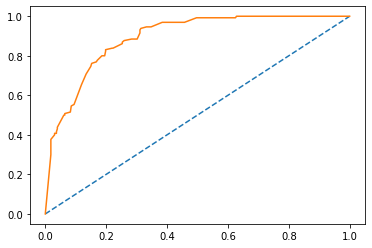

In [126]:
#AUC and ROC for the test data
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % XGB_test_auc)
# calculate roc curve
XGB_test_fpr, XGB_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_test_fpr, XGB_test_tpr)

Comparision of Different Models

In [131]:
index=['Accuracy', 'AUC']
data = pd.DataFrame({'LR Train':[LR_train_acc,LR_train_auc],
        'LR Test':[LR_test_acc,LR_test_auc],
        'KNN Train':[KNN_train_acc,KNN_train_auc],
        'KNN Test':[KNN_test_acc,KNN_test_auc],
        'NB Train':[NB_train_acc,NB_train_auc],
        'NB Test':[NB_test_acc,NB_test_auc],
        'SVM Train':[SVM_train_acc,SVM_train_auc],
        'SVM Test':[SVM_test_acc,SVM_test_auc],
        'RF Train':[RF_train_acc,RF_train_auc],
        'RF Test':[RF_test_acc,RF_test_auc],
        'ADB Train':[ADB_train_acc,ADB_train_auc],
        'ADB Test':[ADB_test_acc,ADB_test_auc],
        'GB Train':[GB_train_acc,GB_train_auc],
        'GB Test':[GB_test_acc,GB_test_auc],
        'XGB Train':[XGB_train_acc,XGB_train_auc],
        'XGB Test':[XGB_test_acc,XGB_test_auc],             
       },index=index)
round(data,2)

,LR Train,LR Test,KNN Train,KNN Test,NB Train,NB Test,SVM Train,SVM Test,RF Train,RF Test,ADB Train,ADB Test,GB Train,GB Test,XGB Train,XGB Test
Accuracy,0.84,0.82,0.85,0.79,0.83,0.83,0.78,0.79,0.85,0.82,0.85,0.82,0.89,0.83,0.83,0.81
AUC,0.89,0.88,0.92,0.84,0.89,0.88,0.87,0.86,0.91,0.89,0.91,0.88,0.95,0.90,0.90,0.89


Conclusion:
Naive Bayes and Gradient Boost Model Performs the Best

Making A Predictive System

In [132]:
#Prediction Using Naive Bayes
input_data = (43,3,3,4,1,2,2,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = NB_model.predict(input_data_reshape)
prediction

array([0])

In [133]:
prediction[0]

0

In [134]:
##Prediction Using Gradient Boost Model
input_data = (43,3,3,4,1,2,2,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = GB_model.predict(input_data_reshape)
prediction

array([0])

In [135]:
prediction[0]

0